<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/10)_B)_NY_Negative_Tweets_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import packages 
import re 
import string
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datetime import datetime
 
import sklearn 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

# Mounting google colab on drive 
from google.colab import drive, files
import os
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Upload negative tweets
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NEWYORK_NEG_COVID19_TWEETS_TOPICS.csv')
tweets_df = data.iloc[:, 1:]
tweets_df

,Datetime,Text,Text_Unprocessed,Sentiment_Score,Sentiment_Score_Norm,Sentiment,Topic,Topic_Neg3,Topic_Neg
0,2021-05-30,pandemic democrats republicans refuse work gra...,during the pandemic democrats and republica...,-0.9118,4.410,negative,0,1,5
1,2021-05-30,stand congress location discrimination policy ...,stand up to the congress location di...,-0.6369,18.155,negative,0,1,5
2,2021-05-30,pay tribute give defense country battle field ...,this is about paying tribute to those who ga...,-0.6170,19.150,negative,2,1,1
3,2021-05-30,intervene stop greg abbott take away covid une...,please intervene and stop greg abbott fro...,-0.2244,38.780,negative,0,2,5
4,2021-05-30,crime covid rate crime subject child violence ...,what about crime covid rates may be down bu...,-0.9628,1.860,negative,3,2,2
...,...,...,...,...,...,...,...,...,...
289348,2020-04-14,sorry listen briefing trump rally need coronav...,sorry i never listen to his briefing i have n...,-0.4717,26.415,negative,3,1,1
289349,2020-04-14,mean they re probably go federal money catalog...,it means theyre probably going to get federa...,-0.5574,22.130,negative,1,1,1
289350,2020-04-14,trump halt fund world health organization fail...,so if trump can halt funding to world health o...,-0.6705,16.475,negative,0,1,5
289351,2020-04-14,ought plan daily joint news conference feature...,you and ought to plan a daily joint news con...,-0.4215,28.925,negative,0,1,4


In [4]:
tweets_df['Topic_Neg'] = tweets_df['Topic_Neg'].astype(str)

# Cutting up the dataset into Topics
filter1_topics = tweets_df['Topic_Neg'] == '0'
Topic_1 = tweets_df[filter1_topics]


filter2_topics = tweets_df['Topic_Neg'] == '1'
Topic_2 = tweets_df[filter2_topics]

filter3_topics = tweets_df['Topic_Neg'] == '2'
Topic_3 = tweets_df[filter3_topics]

filter4_topics = tweets_df['Topic_Neg'] == '3'
Topic_4 = tweets_df[filter4_topics]

filter5_topics = tweets_df['Topic_Neg'] == '4'
Topic_5 = tweets_df[filter5_topics]

filter6_topics = tweets_df['Topic_Neg'] == '5'
Topic_6 = tweets_df[filter6_topics]

group = tweets_df['Sentiment_Score'].groupby(tweets_df['Datetime'])
neg_sent_means = group.mean()
print("New York's overall sentiment average over year:", neg_sent_means.mean())

# Getting daily sentiments for topics 
ngroup_topic1 = Topic_1['Sentiment_Score'].groupby(Topic_1['Datetime'])
nsent_avgs_topic1 = ngroup_topic1.mean()
print("New York's Negative Topic 1 average sentiment:",nsent_avgs_topic1.mean())

ngroup_topic2 = Topic_2['Sentiment_Score'].groupby(Topic_2['Datetime'])
nsent_avgs_topic2 = ngroup_topic2.mean()
print("New York's Negative Topic 2 average sentiment:",nsent_avgs_topic2.mean())

ngroup_topic3 = Topic_3['Sentiment_Score'].groupby(Topic_3['Datetime'])
nsent_avgs_topic3 = ngroup_topic3.mean()
print("New York's Negative Topic 3 average sentiment:",nsent_avgs_topic3.mean())

ngroup_topic4 = Topic_4['Sentiment_Score'].groupby(Topic_4['Datetime'])
nsent_avgs_topic4 = ngroup_topic4.mean()
print("New York's Negative Topic 4 average sentiment:",nsent_avgs_topic4.mean())

ngroup_topic5 = Topic_5['Sentiment_Score'].groupby(Topic_5['Datetime'])
nsent_avgs_topic5 = ngroup_topic5.mean()
print("New York's Negative Topic 5 average sentiment:",nsent_avgs_topic5.mean())

ngroup_topic6 = Topic_6['Sentiment_Score'].groupby(Topic_6['Datetime'])
nsent_avgs_topic6 = ngroup_topic6.mean()
print("New York's Negative Topic 6 average sentiment:",nsent_avgs_topic6.mean())

New York's overall sentiment average over year: -0.5744518825063201
New York's Negative Topic 1 average sentiment: -0.5350663699742801
New York's Negative Topic 2 average sentiment: -0.6225627216681751
New York's Negative Topic 3 average sentiment: -0.5475344727186077
New York's Negative Topic 4 average sentiment: -0.623186894879992
New York's Negative Topic 5 average sentiment: -0.563112575266456
New York's Negative Topic 6 average sentiment: -0.5510687920012455


In [5]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

topic_neg_list = tweets_df['Text'].tolist()
common_words = get_top_n_trigram(topic_neg_list, 15)

df_topic2 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic2['trigram'], y=df_topic2['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for All Negative Topics"))
fig.show()

In [ ]:
for t in tweets_df['Text'][:100]:
  if 'nursing' in t:
    print(t)

pass away hospital instead nurse home attempt hide patient contract virus nursing homebut lie pass away witch hunt good job
suppose believe delibertly lie nursing home death pandemic you ve lose credibility
day year pick recognize lose life covid maybe day decide infect nursing home fitting day
public domain allegation number update ) sexual assaultharassment accuser ) thousand die covid nursing home death camp ) $ mm+ book deal staff + cook covid stat


In [ ]:
for t in tweets_df['Text'][:100]:
  if 'patient' in t:
    print(t)

mean colombian comunist politician create chaos hire terrorist destroy city attack police officer roadblock prevent people have food basic supply live medical supply covid patient kill innocent peopleright
pass away hospital instead nurse home attempt hide patient contract virus nursing homebut lie pass away witch hunt good job
look fact force covid patient vulnerable community


In [ ]:
for t in tweets_df['Text'][306176:]: # checking the last 100 to see if the # of hits goes up over time
  if 'nursing' in t:
    print(t)

nursing home breeding ground covid case pandemic nys nursing home face chronic staffing shortage s propose medicaid cut force nursing home cut deplete resource
crisis stabilize ny signal grow concern nursing home death dry grass big ramification region senior
spread like wildfire nursinghome march wks failure decontaminate sprayampdisinfect city facility lack
home death fdny em talk plus nursing home death people likely test coronavirus prior death


In [ ]:
for t in tweets_df['Text'][306176:]: # checking the last 100 to see if the # of hits goes up over time
  if 'patient' in t:
    print(t)

governor think wait till corona patient admit new york state au hospital week lockdown open economy need virus recipient start wave death
wear mask healthcare worker direct contact covid patient need arrogant jerkoff ppe nurse docs u mask u do nt wear correctly disgusting
michigan democratic gov whitmers administration request emergency supply hydroxychloroquine chloroquineone week whitmer send notice physician demand prescribe drug treat covid patient
know see reminder factor plan unclear covid patient reinfecte
bury potters field unclaimed covid patient contagious learn need cremate die horrible virus leave virus unchecked burying
decide want death toll higher add death patient test positive virus disgusting feel family know truth


In [ ]:
topic1_neg_list = Topic_1['Text'].tolist()
common_words = get_top_n_trigram(topic1_neg_list, 15)

df_topic_neg1 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg1['trigram'], y=df_topic_neg1['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Negative Topic 1"))
fig.show()

In [ ]:
for t in Topic_1['Text_Unprocessed'][:200]:
  if 'mask' in t:
    print(t)

  Big 🍎 NYers Alert!  is BAD for New York. He is in bed with Cuomo. He wants to mandate unsafe vaccines, vaccine passports, continue covid testing in schools and mask mandates.
Take the masks off and stop pushing the Poison. Pandemic is over        
  If masks are stopping the virus, then your clothes, hair and exposed skin are a biohazard and must be thoroughly washed after every contact with a person.
 GA bans masks for kids in schools.   who have the worst Covid records as govs, are still abusing children with masks  
Communities in  left confused by mix messages from , federal, state, and local officials on regulations leaving many feeling  cant even do the post pandemic right. masks, no masks, indoor/outdoors, can we open, discriminating .
 Remote learning option is critical for ALL highrisk staff and students due to: ) Covid mutations India, ) No vaccine yet for grade school ~ , ) Vaccine not  effective, ) Israel the most vaccinated country requires indoor masks EVERYWHERE even i

In [ ]:
for t in Topic_1['Text_Unprocessed'][:100]:
  if 'die' in t:
    print(t)

 Question: Out of the number of people who were hospitalized and died from COVID yesterday, were any of them fully vaccinated  Inquiring minds would like to know.
    The Spanish flu. At  either they were already infected or have died from it therefore it was slowly eradicated. Not enough ppl were found for the virus to infect new blood
 Question: Out of the number of people who were hospitalized and died from COVID yesterday, were any of them fully vaccinated  Inquiring minds would like to know.
  Nobody has, so you just sound like an ignorant moron, but guess how many died from the virus that youll take your chances with since the death rate is so low Are you afraid of a little needle ❄️❄️❄️
I agree with you💯 Rob.  needs to step up to the plate &ampmake us see that we didnt risk it all by going out to vote in this pandemic to get him where here is. Trust&amp believe if he doesnt do away with the  Democracy will die a slow death under his watch.
   What are you on about lady. No we di

In [ ]:
for t in Topic_1['Text_Unprocessed'][:100]:
  if 'vaccine' in t:
    print(t)

  Imagine a pandemic that was so dangerous you had to bribe people to get jabbed with an not yet approved vaccine
  Big 🍎 NYers Alert!  is BAD for New York. He is in bed with Cuomo. He wants to mandate unsafe vaccines, vaccine passports, continue covid testing in schools and mask mandates.
  If you count individuals who had the virus, we have reached her immunity (approx. ). That doesnt mean you shouldnt get the vaccine, it means were over it and it should be treated no different than the flu.    
     .. how can you ethically mandate vaccines with EUA in a population of students not at risk for death by Covid ,without long term safety.. as learnings of higher education do better, drop your vaccine mandate now !
  Hyppa was designed for privacy in medical practices. The virus is . curable. If youve had the vaccine really dont get why the hell you care if anyone else has. Dont start treating me differently in public places  
   The vaccine never guaranteed against catching Covid. The va

In [ ]:
topic2_neg_list = Topic_2['Text'].tolist()
common_words = get_top_n_trigram(topic2_neg_list, 15)

df_topic_neg2 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg2['trigram'], y=df_topic_neg2['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Negative Topic 2"))
fig.show()

In [ ]:
for t in Topic_2['Text_Unprocessed'][:100]:
  if 'kill' in t:
    print(t)

   declared this weekend  to memorial for those who died from corona virus. Thousands of whom he is directly  responsible for killimg
 Sexual harassment accusers were a public diversion to obscure the FACT that  ‘s policies killed k seniors to pump up pandemic numbers while ignoring  ‘s help and leaving Naval medical ship empty.
 There was no interaction. Know how you can tell No Congressman or senator was drugged out in the street and executed stop spreading your lies and propaganda. Speaking of mass murderers, how many old people did you kill with Covid
 You slimy piece of filth. Memorial Day weekend is to honor the fallen troops who gave their lives in the service of this country, not for essential workers or covid. How dare you attempt to hijack such a sacred holiday How about focusing on the nursing home patients you killed.
 Ha! Except for hundreds/thousands of Jews Mario Cuomos son Andrew killed w/ his Covid ordersthats exempt. In fairness, none of the women he sexually harassed

In [ ]:
for t in Topic_2['Text_Unprocessed'][:100]:
  if 'home' in t:
    print(t)

 If someone passed away at a hospital instead of the nursing home, there is no attempt to hide anything.  The patient may have contracted the virus in the nursing home...but there was no lie about where they passed away.  This is a witch hunt against  He did a good job!
  how we supposed to believe anything you say When you delibertly lied about the nursing home deaths during the pandemic Youve lost all credibility
   you had about  other days of the year you could have picked to recognize those who lost their lives to Covid. Maybe the day you decided to infect nursing homes would have been a more fitting day. 
 Public Domain Allegations Numbers update: ) sexual assault/harassment accusers ) thousands dying in covid nursing home death camps ) $MM+ book deal by staff + cooking covid stats      
OPINION:  Its no coincidence that  of the worst virus outbreaks took place in states that failed to protect their elderly populations.  Both  and  passed policies forcing nursing homes to accept 

In [7]:
topic3_neg_list = Topic_3['Text'].tolist()
common_words = get_top_n_trigram(topic3_neg_list, 15)

df_topic_neg3 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg3['trigram'], y=df_topic_neg3['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Negative Topics 3"))
fig.show()

In [ ]:
for t in Topic_3['Text_Unprocessed'][:2000]:
  if 'social' in t:
    print(t)

  (Tape dated February , .) People were riding crowded subways getting sick, and Trump just stayed quiet, so as not to hurt the economy he needed to win reelection.  Later he called COVID a Democratic hoax, mocked  masks, and social distancing.  He is a premeditated murderer.
 Covid coming from a lab was banned from social media. Now it is not. Lets just see where this election stuff ends up
    Issue is my son is an only child speech delayed and lacks socializing because of Covid. So we were so excited to start him in this program. Its actually devastating
 The American people who are suffering in the pandemic need$ per month to survive and$ per month for all social security recipients per month to get out of poverty
On the anniversary of the killing of . All  NYC Dem. Candidates for Mayor will be questioned on how to move NYC forward on issues concerning civil rights, social justice and closing the racial gap that has left many New Yorkers in poverty in the wake of the pandemic.  
 T

In [ ]:
for t in Topic_3['Text_Unprocessed'][:1000]:
  if 'lock' in t:
    print(t)

 Then why have you Blocked the  in Middleclass EIDL Grants adding Targeted Location discrimination during Pandemic.   is a mess and  blocking vote on Floor of S . You have failed hardworking Americans .Weve learned never trust Congress
.      Is China doing business with HUNTER BIDEN  Did not China create the C virus  Is not Pelosi blocking Chinese investigations  Whats going on here. ARE ANY OF YOU ON THE TAKE  Holy Shit.  Do your job!
              You mean, the Colombian comunists politicians created chaos, hiring terrorists for destroying the city, attacking police officers and roadblocks, preventing people from having food, basic supplies for living, medical supplies for covid patients and killing innocent people.Right
 People stood in line + hours MID PANDEMIC to deliver you the majority.  if Sen Dems dont get rid of filibuster and get shit done, this will likely be the last majority dems get. McConnell blocked Obama every time he could. He isnt even leader and here we are again.

In [6]:
topic4_neg_list = Topic_4['Text'].tolist()
common_words = get_top_n_trigram(topic4_neg_list, 15)

df_topic_neg4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg4['trigram'], y=df_topic_neg4['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Negative Topics 4"))
fig.show()

In [8]:
topic5_neg_list = Topic_5['Text'].tolist()
common_words = get_top_n_trigram(topic3_neg_list, 15)

df_topic_neg5 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg5['trigram'], y=df_topic_neg5['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Negative Topics 5"))
fig.show()

In [9]:
topic6_neg_list = Topic_6['Text'].tolist()
common_words = get_top_n_trigram(topic6_neg_list, 15)

df_topic_neg6 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg6['trigram'], y=df_topic_neg6['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Negative Topics 6"))
fig.show()

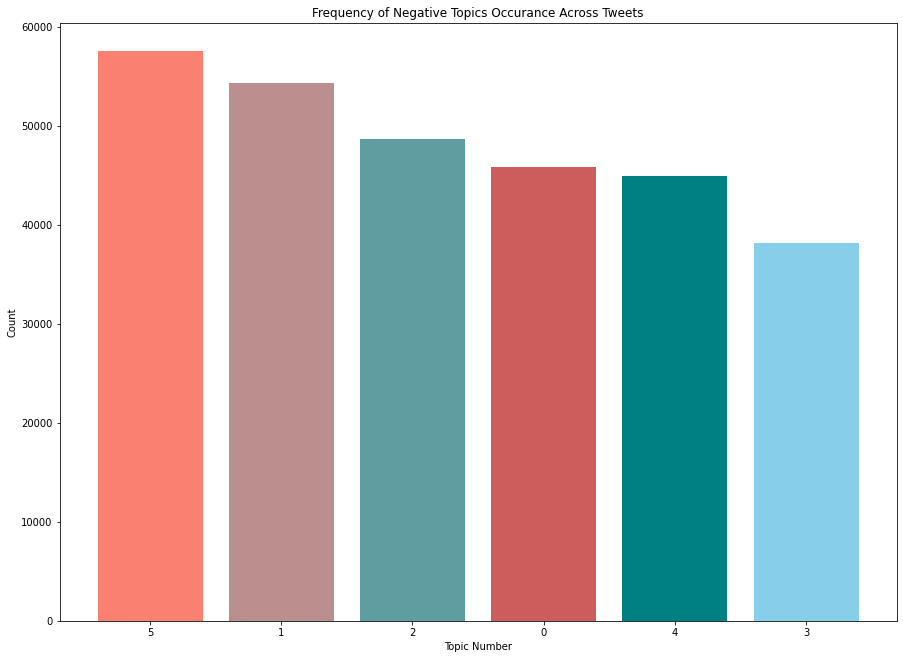

In [13]:
# Frequency of topic # and cluster # occurances across dataset
num_topics = tweets_df['Topic_Neg'].unique()
topic_counts = tweets_df['Topic_Neg'].value_counts()
plt.bar(x = num_topics, height = topic_counts, color = ['salmon', 'rosybrown', 'cadetblue', 'indianred', 'teal', 'skyblue'])
plt.xlabel("Topic Number")
plt.ylabel("Count")
plt.title("Frequency of Negative Topics Occurance Across Tweets")
plt.rc('figure', figsize=(15,11))
plt.show()

In [14]:
!pip install calmap
import calmap

New York's tweets average sentiment: -0.5744518825063201


(<Figure size 1224x792 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9166e0190>,
       dtype=object))

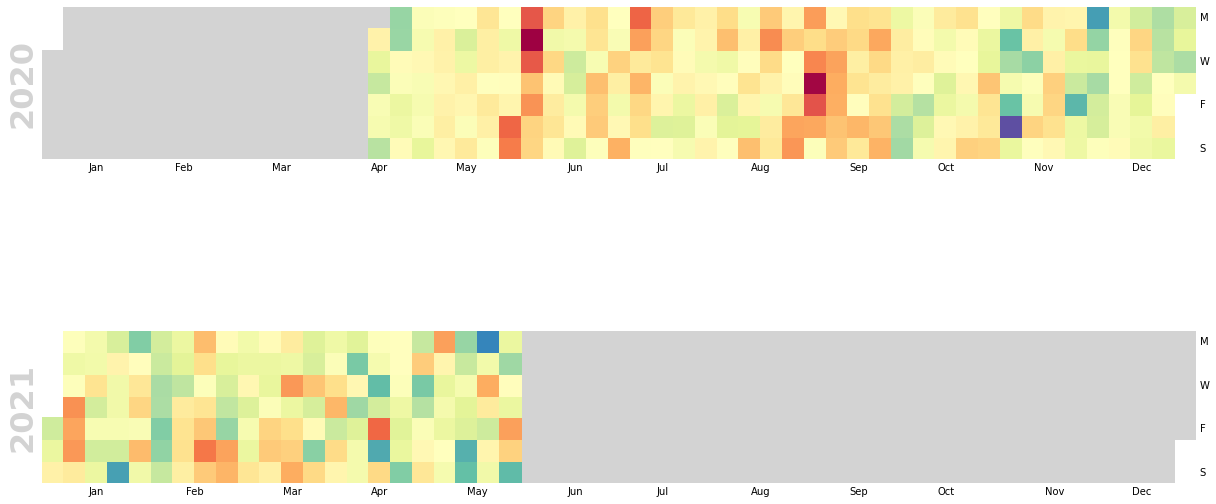

In [21]:
data_o = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NEWYORK_COVID19_TWEETS_TOPICS.csv')
tweets_df_o = data.iloc[:, 1:]

#overall sentiments
ngroup_all_original = tweets_df_o['Sentiment_Score'].groupby(tweets_df_o['Datetime'])
nsent_avgs_allTweets_o = ngroup_all_original.mean() 
print("New York's tweets average sentiment:", nsent_avgs_allTweets_o.mean())

neg_sent_lsito = nsent_avgs_allTweets_o.to_list()
# Extra Negative Days out of all negative tweets
days = pd.DatetimeIndex(nsent_avgs_allTweets_o.index)
events = pd.Series(neg_sent_lsito, index=days)

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap='Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=0,
                    fig_kws=dict(figsize=(17, 11)))

In [15]:
neg_sent_lsit = neg_sent_means.to_list()
neg_sent_t1 = nsent_avgs_topic1.to_list()
neg_sent_t2 = nsent_avgs_topic2.to_list()
neg_sent_t3 = nsent_avgs_topic3.to_list()
neg_sent_t4 = nsent_avgs_topic4.to_list()
neg_sent_t5 = nsent_avgs_topic5.to_list()
neg_sent_t6 = nsent_avgs_topic6.to_list()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


(<Figure size 1224x792 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc92dff2210>,
       dtype=object))

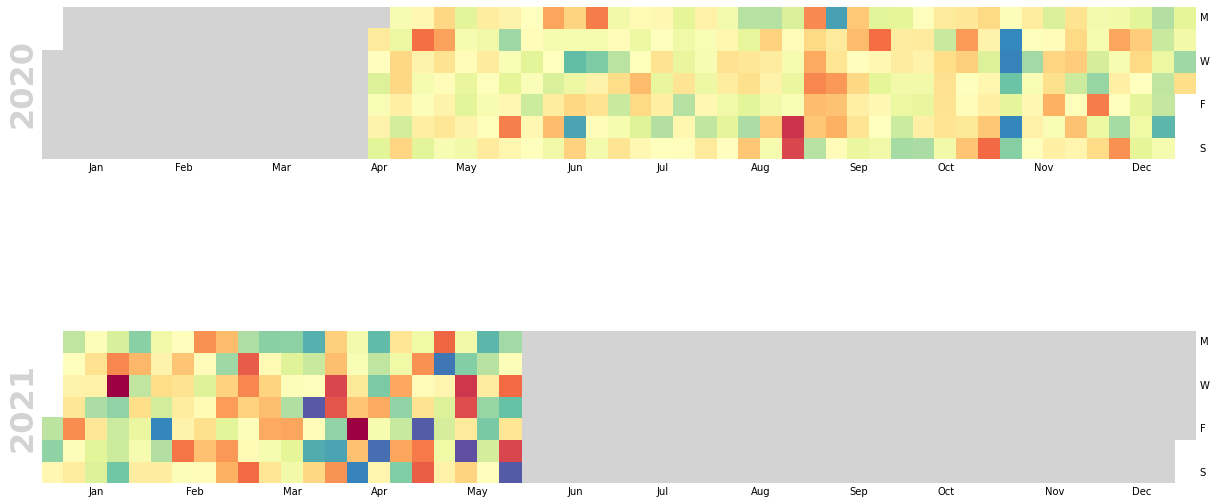

In [16]:
# Extra Negative Days out of all negative tweets
days = pd.DatetimeIndex(nsent_avgs_topic1.index)
events = pd.Series(neg_sent_t1, index=days)

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=0,
                    fig_kws=dict(figsize=(17, 11)))

(<Figure size 1224x792 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff810ddc5d0>,
       dtype=object))

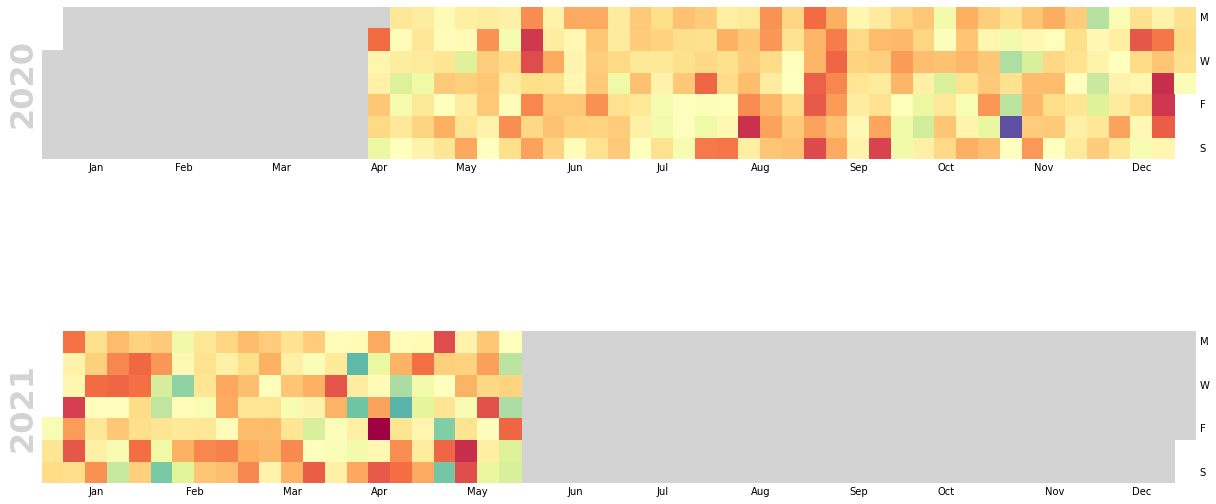

In [ ]:
days2 = pd.DatetimeIndex(nsent_avgs_topic2.index)
events2 = pd.Series(neg_sent_t2 , index=days2)

calmap.calendarplot(events2, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=0,
                    fig_kws=dict(figsize=(17, 11)))

(<Figure size 1224x792 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff800f24950>,
       dtype=object))

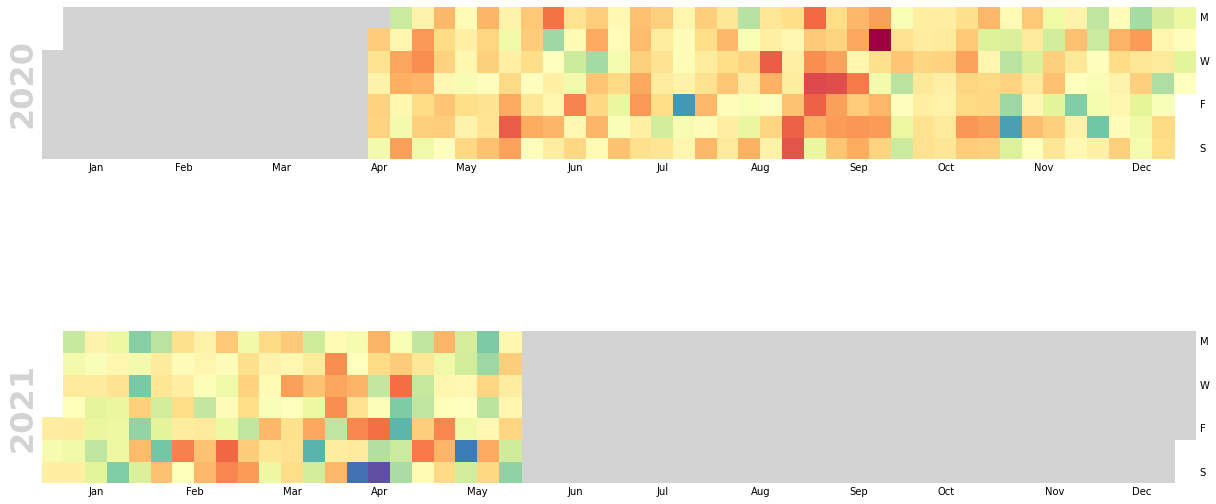

In [ ]:
days3 = pd.DatetimeIndex(nsent_avgs_topic3.index)
events3 = pd.Series(neg_sent_t3 , index=days3)

calmap.calendarplot(events3, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=0,
                    fig_kws=dict(figsize=(17, 11)))

(<Figure size 1224x792 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9249923d0>,
       dtype=object))

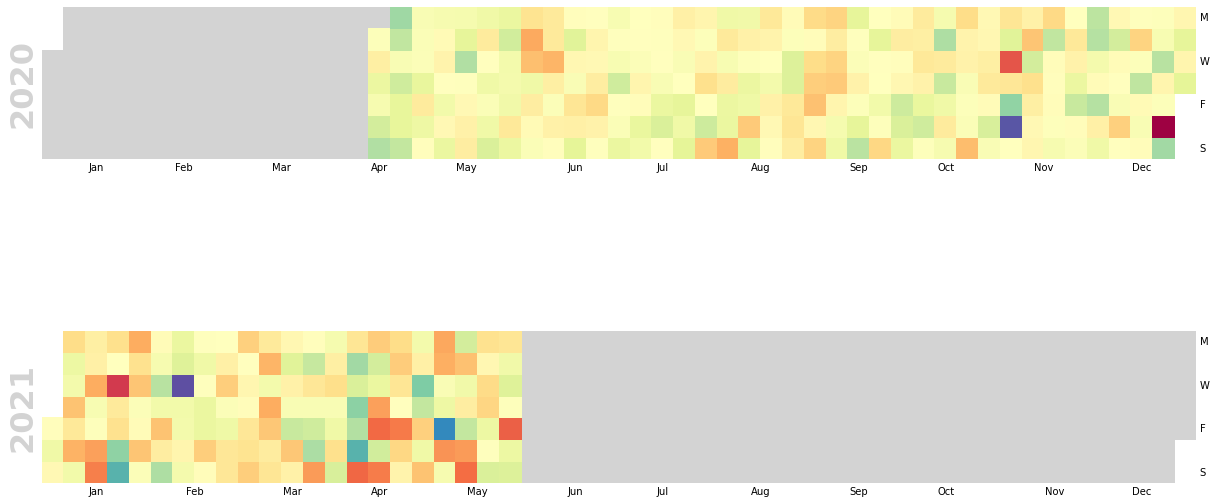

In [23]:
days4 = pd.DatetimeIndex(nsent_avgs_topic4.index)
events4 = pd.Series(neg_sent_t4 , index=days4)

calmap.calendarplot(events4, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=0,
                    fig_kws=dict(figsize=(17, 11)))

(<Figure size 1224x792 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc91946b0d0>,
       dtype=object))

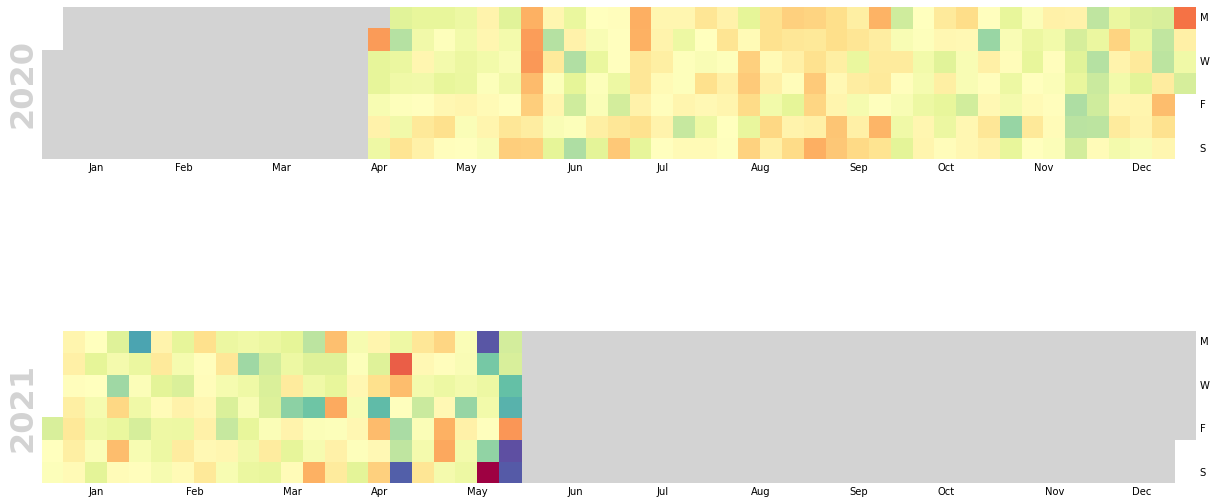

In [24]:
days5 = pd.DatetimeIndex(nsent_avgs_topic5.index)
events5 = pd.Series(neg_sent_t5 , index=days5)

calmap.calendarplot(events5, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=0,
                    fig_kws=dict(figsize=(17, 11)))

(<Figure size 1224x792 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc913e2ef10>,
       dtype=object))

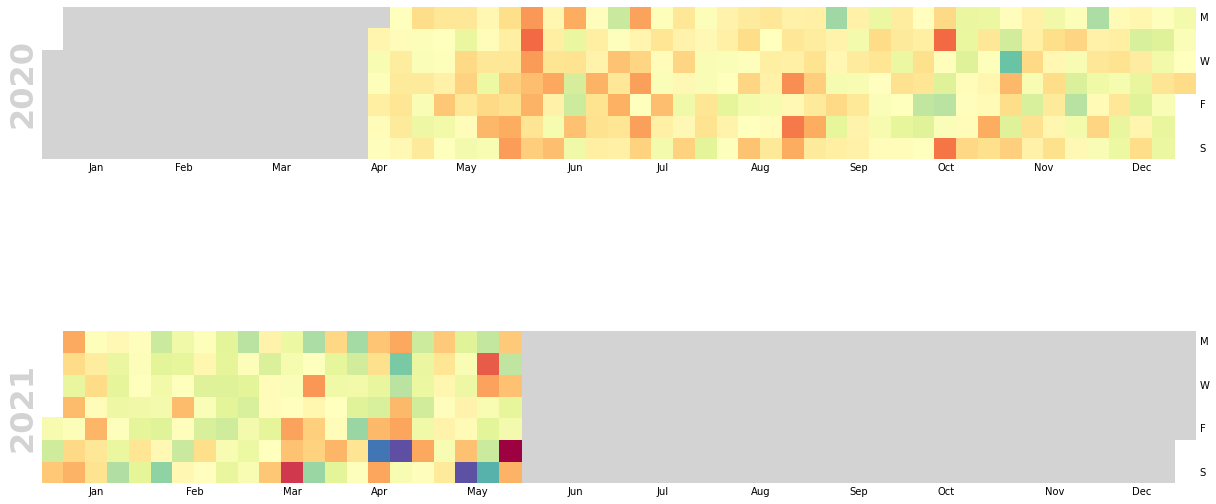

In [25]:
days6 = pd.DatetimeIndex(nsent_avgs_topic6.index)
events6 = pd.Series(neg_sent_t6 , index=days6)

calmap.calendarplot(events6, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=0,
                    fig_kws=dict(figsize=(17, 11)))

In [ ]:
all_tweets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NEWYORK_COVID19_TWEETS_FCCC3.csv')
all_tweets2 = all_tweets.iloc[:, 1:]

group2 = all_tweets2['Sentiment_Score_Norm'].groupby(all_tweets2['Datetime'])
sent_means = group2.mean()

(<Figure size 1224x792 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff809f7b910>,
       dtype=object))

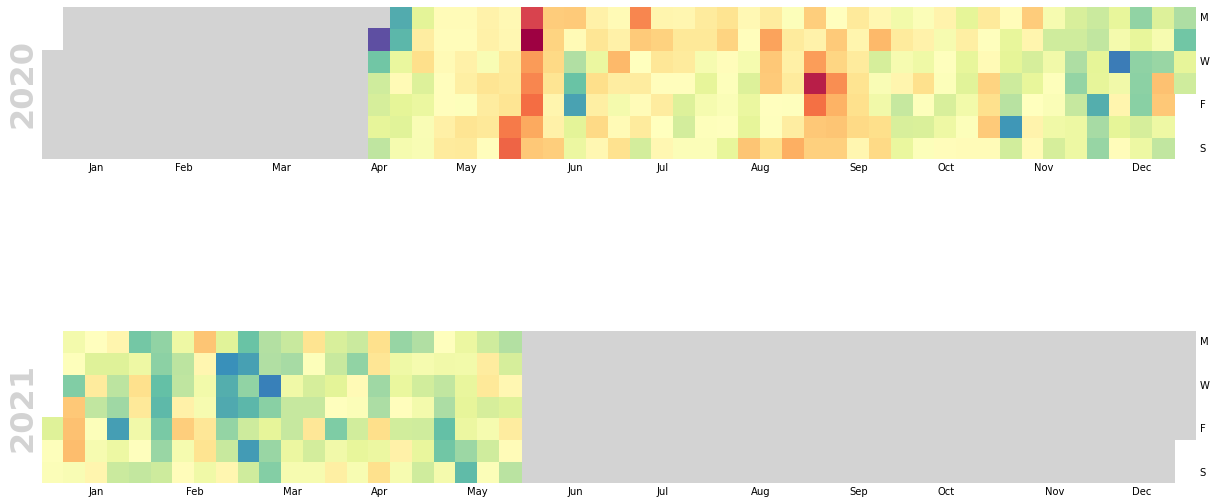

In [ ]:
sent_list = sent_means.to_list()
days_all = pd.DatetimeIndex(sent_means.index)
events_all = pd.Series(sent_list, index=days_all)

calmap.calendarplot(events_all, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap='Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=0,
                    fig_kws=dict(figsize=(17, 11)))